In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geopy.distance import geodesic

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

In [2]:
# load train and test data

# train set
df_mess_train = pd.read_csv('mess_train_list.csv')

# test set
df_mess_test = pd.read_csv('mess_test_list.csv')

# position associated to train set
pos_train = pd.read_csv('pos_train_list.csv') 

## Stations de base

In [3]:
# determine all Base stations that received at least 1 message
listOfBs = np.union1d(np.unique(df_mess_train['bsid']),
                      np.unique(df_mess_test['bsid'])) 

print(f"Number of stations: {len(listOfBs)}")

Number of stations: 259


In [4]:
df_mess_all = pd.concat([df_mess_train, df_mess_test])
df_bsloc_all = df_mess_all.groupby('bsid')[['bs_lat', 'bs_lng']].first()

lon_min = df_bsloc_all['bs_lng'].min()
lon_max = df_bsloc_all['bs_lng'].max()

lat_min = df_bsloc_all['bs_lat'].min()
lat_max = df_bsloc_all['bs_lat'].max()

print(f"lon (min / max) = {lon_min:.3f}, {lon_max:.3f}")
print(f"lat (min / max) = {lat_min:.3f}, {lat_max:.3f}")

df_bsloc_all.head()

lon (min / max) = -110.957, -68.500
lat (min / max) = 36.053, 64.300


,bs_lat,bs_lng
bsid,,
879,39.739013,-105.392793
911,42.324279,-107.159505
921,42.131222,-107.008741
944,41.424900,-106.143919
980,38.997730,-104.684275


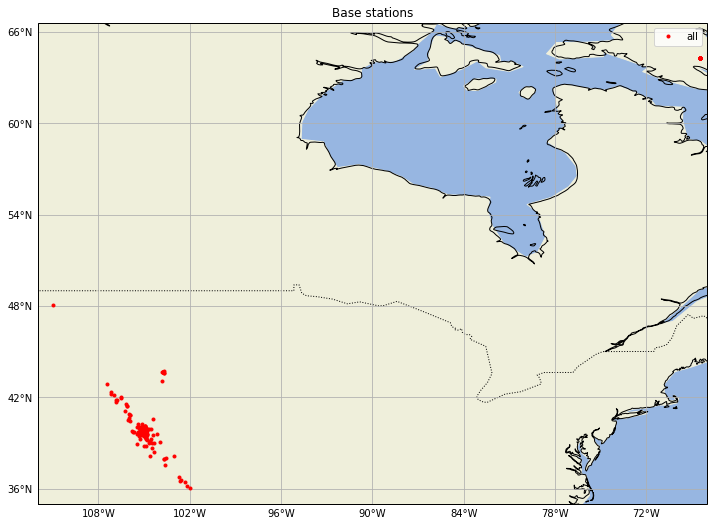

In [5]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plt.grid()
ax.set_extent([round(lon_min - 1.), round(lon_max + 1.),
               round(lat_min - 1.), round(lat_max + 1.),])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='50m')

# plot BS
ax.plot(df_bsloc_all['bs_lng'], df_bsloc_all['bs_lat'],
        '.', color='red', label='all')

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title("Base stations")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

plt.legend()
plt.show()

### BS train vs BS test

In [6]:
df_bsloc_train = df_mess_train.groupby('bsid')[['bs_lat', 'bs_lng']].first()
df_bsloc_test = df_mess_test.groupby('bsid')[['bs_lat', 'bs_lng']].first()

df_bsloc_intersect = df_bsloc_train.merge(df_bsloc_test, how='inner',
                                          on=['bsid','bs_lat', 'bs_lng'] )

df_bsloc_train_only = pd.merge(df_bsloc_train, df_bsloc_test,
                               on=['bsid','bs_lat', 'bs_lng'],
                               how="outer", indicator=True) \
                        .query('_merge=="left_only"') \
                        .drop(columns=['_merge'])

df_bsloc_test_only = pd.merge(df_bsloc_test, df_bsloc_train,
                               on=['bsid','bs_lat', 'bs_lng'],
                               how="outer", indicator=True) \
                        .query('_merge=="left_only"') \
                        .drop(columns=['_merge'])

print(f"all={df_bsloc_all.shape}")
print(f"intersection={df_bsloc_intersect.shape}")
print(f"train_only={df_bsloc_train_only.shape}")
print(f"test_only{df_bsloc_test_only.shape}")

all=(259, 2)
intersection=(160, 2)
train_only=(91, 2)
test_only(8, 2)


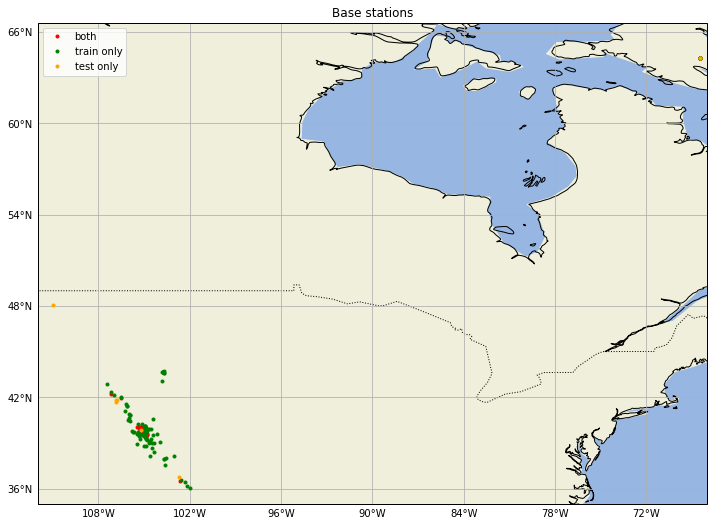

In [7]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plt.grid()
ax.set_extent([round(lon_min - 1.), round(lon_max + 1.),
               round(lat_min - 1.), round(lat_max + 1.),])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='50m')

# plot BS
ax.plot(df_bsloc_intersect['bs_lng'], df_bsloc_intersect['bs_lat'],
        '.', color='red', label='both')
ax.plot(df_bsloc_train_only['bs_lng'], df_bsloc_train_only['bs_lat'],
        '.', color='green', label='train only')
ax.plot(df_bsloc_test_only['bs_lng'], df_bsloc_test_only['bs_lat'],
        '.', color='orange', label='test only')

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title("Base stations")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

plt.legend()
plt.show()

## Positions des émetteurs (train only)

In [8]:
pos_train.head()

,lat,lng
0,39.606690,-104.958490
1,39.606690,-104.958490
2,39.637741,-104.958554
3,39.730417,-104.968940
4,39.730417,-104.968940


In [9]:
pos_train.shape

(39250, 2)

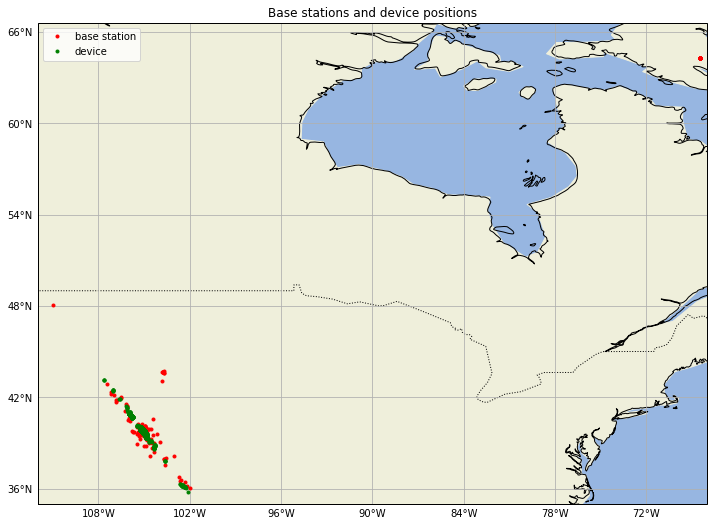

In [10]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plt.grid()
ax.set_extent([round(lon_min - 1.), round(lon_max + 1.),
               round(lat_min - 1.), round(lat_max + 1.),])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='50m')

# plot BS
ax.plot(df_bsloc_all['bs_lng'], df_bsloc_all['bs_lat'],
        '.', color='red', label='base station')
ax.plot(pos_train['lng'], pos_train['lat'],
        '.', color='green', label='device')

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title("Base stations and device positions")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

plt.legend()
plt.show()

### anomalies

In [11]:
df_except = df_mess_all[df_mess_all['bs_lat'] > 60]

print(f"Number of stations = {len(np.unique(df_except['bsid']))}")
print(f"Number of messages = {df_except.shape[0]}")

Number of stations = 29
Number of messages = 7458


### RSSI fonction de la distance

In [12]:
def vincenty_vec(vec_coord):
    """ Now using geodesic distance instead of Vincenty """
    vin_vec_dist = np.zeros(vec_coord.shape[0])
    if vec_coord.shape[1] != 4:
        print('ERROR: Bad number of columns (shall be = 4)')
    else:
        vin_vec_dist = [geodesic(vec_coord[m, 0:2], vec_coord[m, 2:]).meters for m in range(vec_coord.shape[0])]

    return vin_vec_dist

In [13]:
df_distance = pd.concat([df_mess_train, pos_train], axis=1)
df_distance.shape

(39250, 10)

In [14]:
df_distance.columns

Index(['messid', 'bsid', 'did', 'nseq', 'rssi', 'time_ux', 'bs_lat', 'bs_lng',
       'lat', 'lng'],
      dtype='object')

In [31]:
df_distance['distance_m'] = df_distance.apply(lambda x: geodesic([x['bs_lat'], x['bs_lng']], [x['lat'], x['lng']]).meters, axis=1)

In [32]:
df_distance = df_distance.sort_values(by=['distance_m'])

# near: distance <= 100 km
df_distance_near = df_distance[df_distance['distance_m'] <= 100000]
# far: distance > 100 km
df_distance_far = df_distance[df_distance['distance_m'] > 100000]

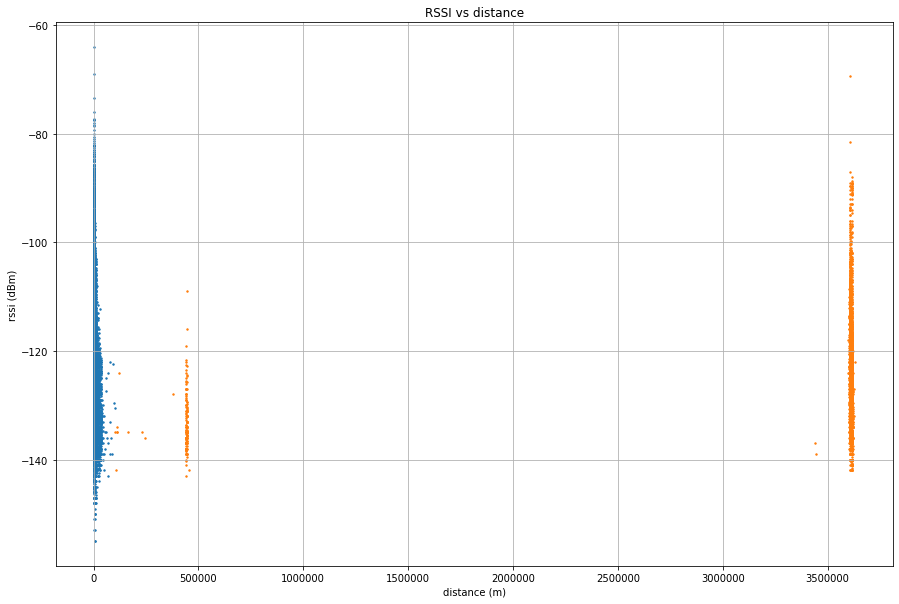

In [33]:
fig = plt.figure(figsize=(15, 10))

plt.grid()

plt.title('RSSI vs distance')
plt.xlabel('distance (m)')
plt.ylabel('rssi (dBm)')

plt.scatter(df_distance_near['distance_m'], df_distance_near['rssi'], s=2, label='near')
plt.scatter(df_distance_far['distance_m'], df_distance_far['rssi'], s=2, label='far')

plt.show()

#### zoom

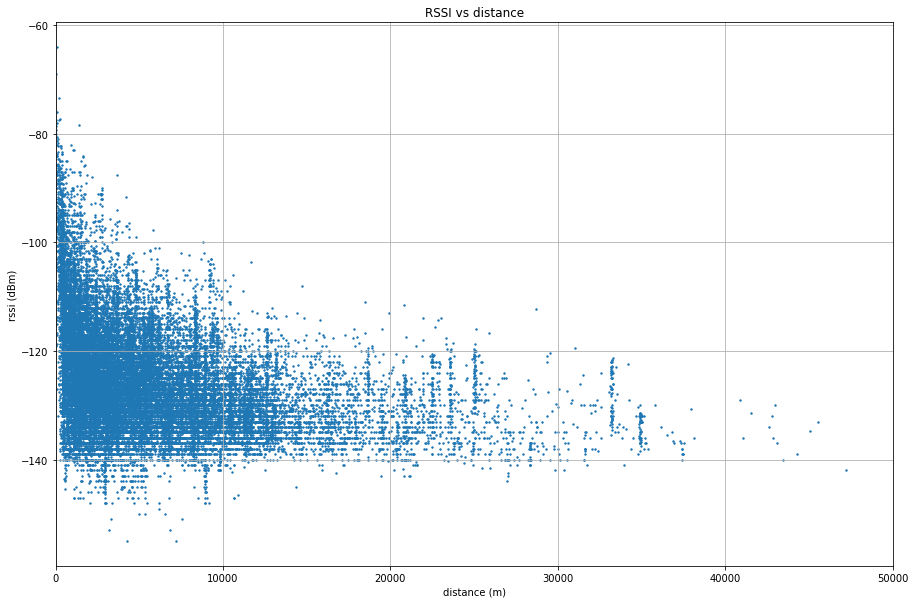

In [34]:
fig = plt.figure(figsize=(15, 10))

plt.grid()

plt.title('RSSI vs distance')
plt.xlabel('distance (m)')
plt.ylabel('rssi (dBm)')

plt.xlim(0.0, 50000.0)
plt.scatter(df_distance_near['distance_m'], df_distance_near['rssi'], s=2)

plt.show()

In [35]:
print(f"Nombre de messages \"courtes distances\": {df_distance_near['distance_m'].count()}")
print(f"Nombre de messages \"longues distances\": {df_distance_far['distance_m'].count()}")

Nombre de messages "courtes distances": 34674
Nombre de messages "longues distances": 4576


In [39]:
df_bsloc_near = df_distance_near.groupby('bsid')[['bs_lat', 'bs_lng']].first()
df_bsloc_far = df_distance_far.groupby('bsid')[['bs_lat', 'bs_lng']].first()

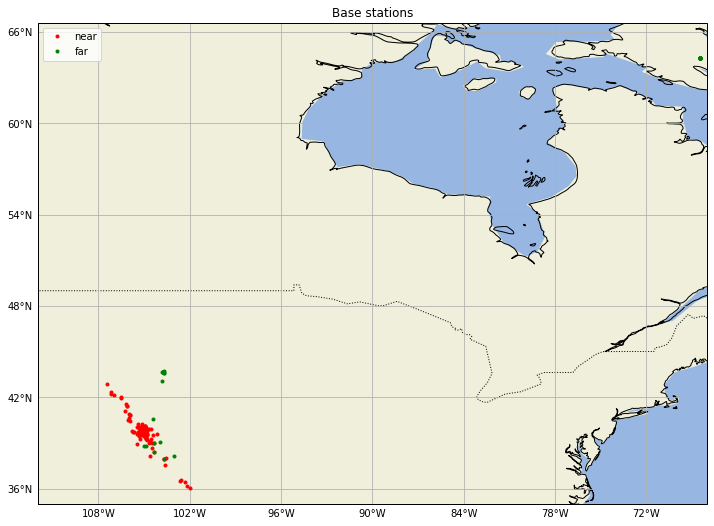

In [41]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plt.grid()
ax.set_extent([round(lon_min - 1.), round(lon_max + 1.),
               round(lat_min - 1.), round(lat_max + 1.),])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='50m')

# plot BS
ax.plot(df_bsloc_near['bs_lng'], df_bsloc_near['bs_lat'],
        '.', color='red', label='near')
ax.plot(df_bsloc_far['bs_lng'], df_bsloc_far['bs_lat'],
        '.', color='green', label='far')

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title("Base stations")
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

plt.legend()
plt.show()